In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
import seaborn as sns

In [ ]:
from IPython.display import display, Math

display(Math(r'''\begin{align*}
\frac{dS}{dt} &= -\frac{\beta S I}{N} \\
\frac{dI}{dt} &= \frac{\beta S I}{N} - (\mu + \gamma) I \\
\frac{dD}{dt} &= \mu I \\
\frac{dR}{dt} &= \gamma I
\end{align*}'''))

display(Math(r'R_0 = \frac{\beta}{\gamma}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [41]:
def analyze_recovery_rates(beta, mu, N, I0, simulation_days):
    """
    Analyze epidemic outcomes for different recovery rates.
    Uses forward Euler method to solve the SIRD model.

    Parameters:
    -----------
    beta : float
        Transmission rate
    mu : float  
        Mortality rate
    N : int
        Total population
    I0 : int
        Initial infected individuals
    simulation_days : int
        Simulation duration in days

    Returns:
    --------
    pandas.DataFrame
        Results summary for each recovery rate
        columns: ['gamma', 'R0', 'peak_infected', 'peak_day', 'total_deaths']
    plots
        Time series for S, I, D, R for each recovery rate
        
    """
    
    gamma_values = [0.05, 0.1, 0.15, 0.2, 0.25]
    
    results = pd.DataFrame(columns=['gamma', 'R0', 'peak_infected', 'peak_day', 'total_deaths'])
    timeseries = []

    for gamma in gamma_values:
        S = N - I0
        I = I0
        D = 0
        R = 0

        S_list = [S]
        I_list = [I]
        D_list = [D]
        R_list = [R]

        I_max = I0
        t_max = 0

        for i in range(simulation_days):
            S_new = S + (-beta*S*I/N)
            I_new = I + (beta*S*I/N - (mu + gamma)*I)
            D_new = D + (mu*I)
            R_new = R + (gamma*I)

            S = S_new
            I = I_new
            D = D_new
            R = R_new

            S_list.append(S)
            I_list.append(I)
            D_list.append(D)
            R_list.append(R)

            if I > I_max:
                I_max = I
                t_max = i

        t = np.arange(simulation_days+1)
        timeseries.append((t, S_list, I_list, D_list, R_list, gamma))

        R0 = beta / (gamma + mu)
        D_final = D

        results.loc[len(results)] = [gamma, R0, round(I_max), int(t_max), round(D_final)]

    return results, timeseries

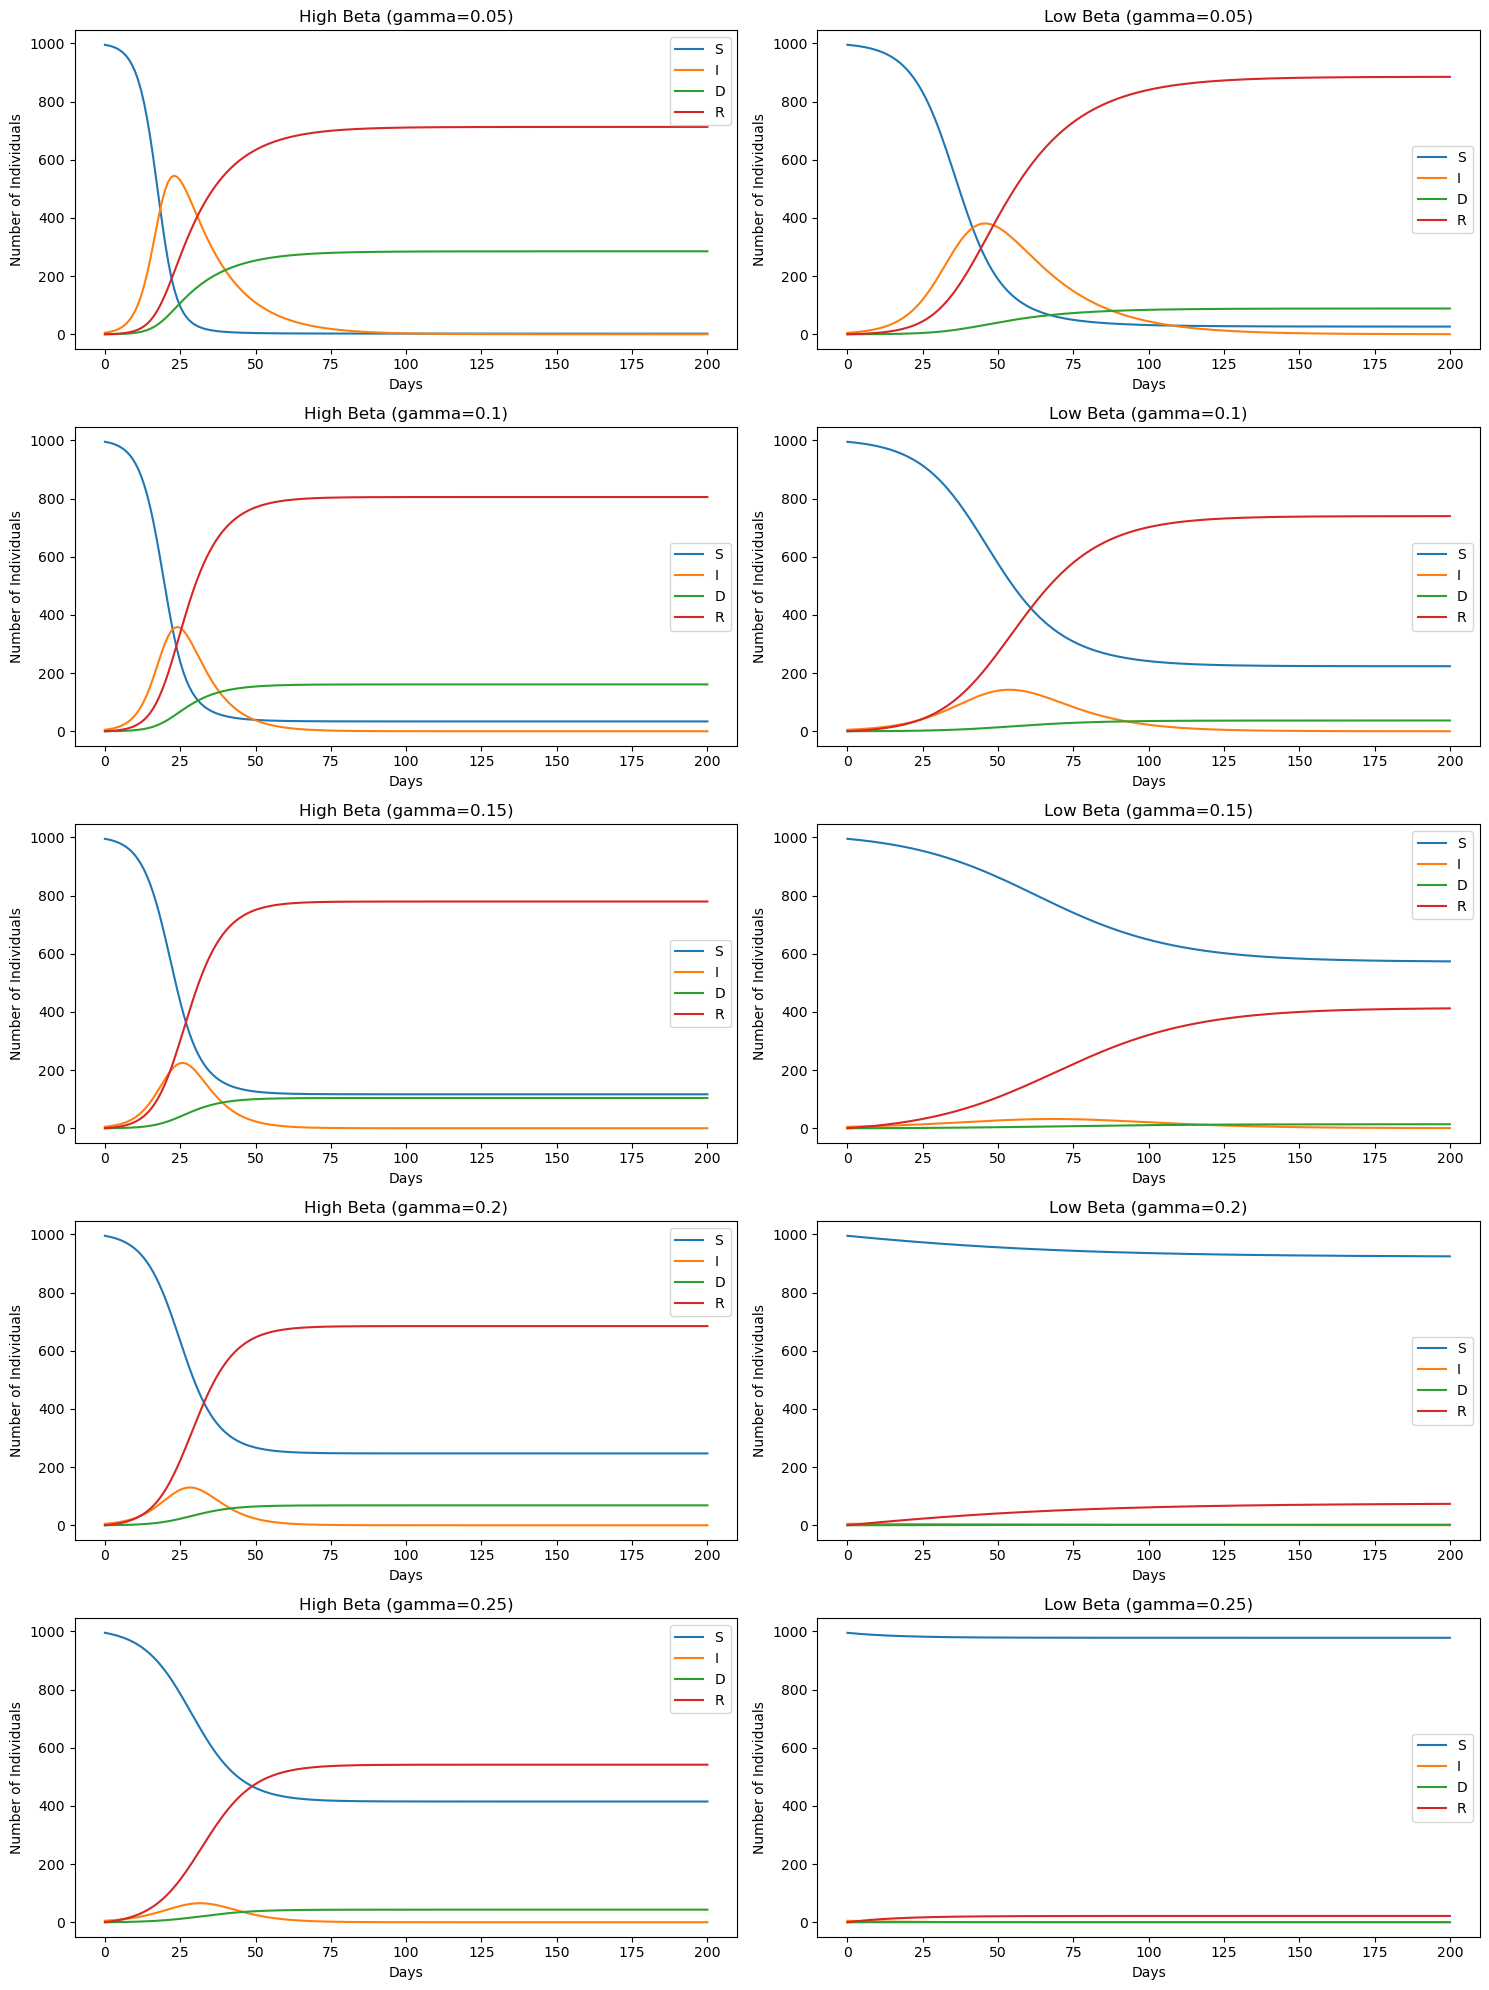

In [42]:
results_high, timeseries_high = analyze_recovery_rates(beta=0.4, mu=0.02, N=1000, I0=5, simulation_days=200)
results_low, timeseries_low = analyze_recovery_rates(beta=0.2, mu=0.005, N=1000, I0=5, simulation_days=200)

gamma_values = [0.05, 0.1, 0.15, 0.2, 0.25]
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

for i, gamma in enumerate(gamma_values):
    # High beta plot
    t_high, S_high, I_high, D_high, R_high, _ = timeseries_high[i]
    axes[i, 0].plot(t_high, S_high, label='S')
    axes[i, 0].plot(t_high, I_high, label='I')
    axes[i, 0].plot(t_high, D_high, label='D')
    axes[i, 0].plot(t_high, R_high, label='R')
    axes[i, 0].set_title(f'High Beta (gamma={gamma})')
    axes[i, 0].set_xlabel('Days')
    axes[i, 0].set_ylabel('Number of Individuals')
    axes[i, 0].legend()
    
    # Low beta plot
    t_low, S_low, I_low, D_low, R_low, _ = timeseries_low[i]
    axes[i, 1].plot(t_low, S_low, label='S')
    axes[i, 1].plot(t_low, I_low, label='I')
    axes[i, 1].plot(t_low, D_low, label='D')
    axes[i, 1].plot(t_low, R_low, label='R')
    axes[i, 1].set_title(f'Low Beta (gamma={gamma})')
    axes[i, 1].set_xlabel('Days')
    axes[i, 1].set_ylabel('Number of Individuals')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

In [43]:
display(results_high)
display(results_low)

,gamma,R0,peak_infected,peak_day,total_deaths
0,0.05,5.714286,545.0,22.0,285.0
1,0.10,3.333333,358.0,23.0,161.0
2,0.15,2.352941,225.0,25.0,104.0
3,0.20,1.818182,130.0,27.0,68.0
4,0.25,1.481481,65.0,31.0,43.0


,gamma,R0,peak_infected,peak_day,total_deaths
0,0.05,3.636364,381.0,45.0,88.0
1,0.10,1.904762,143.0,53.0,37.0
2,0.15,1.290323,32.0,67.0,14.0
3,0.20,0.975610,5.0,0.0,2.0
4,0.25,0.784314,5.0,0.0,0.0


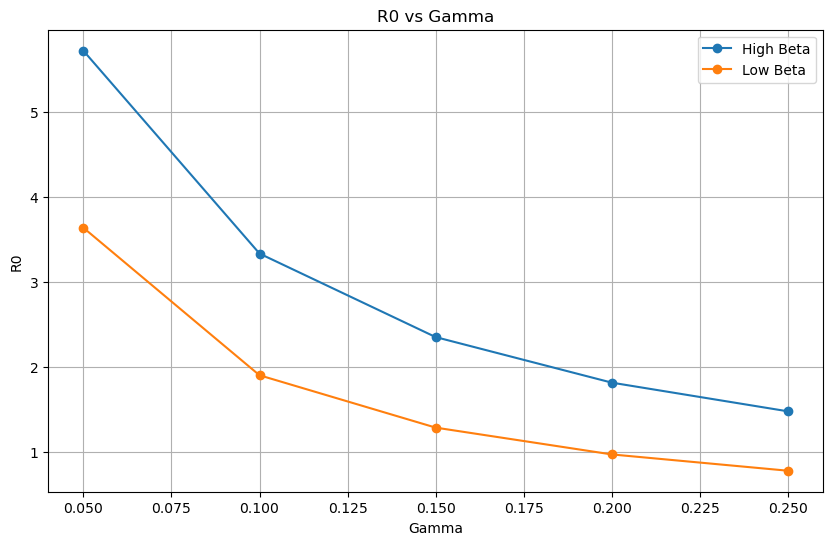

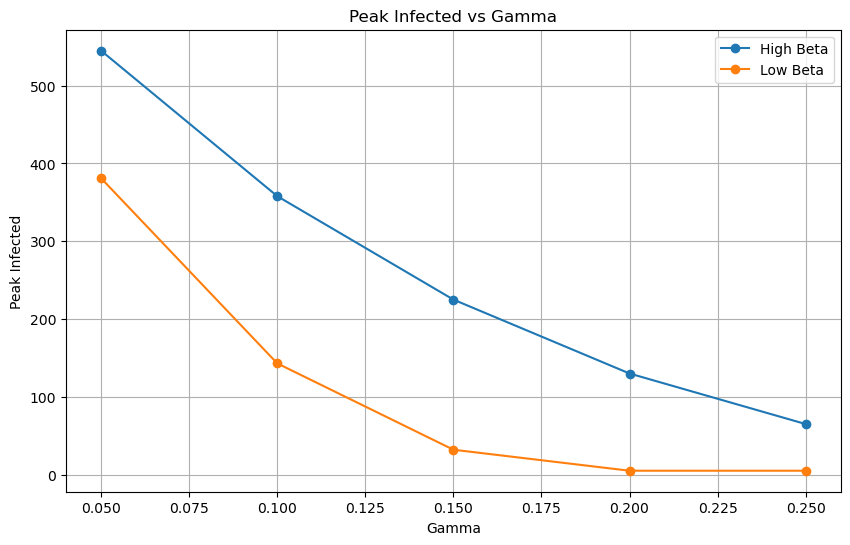

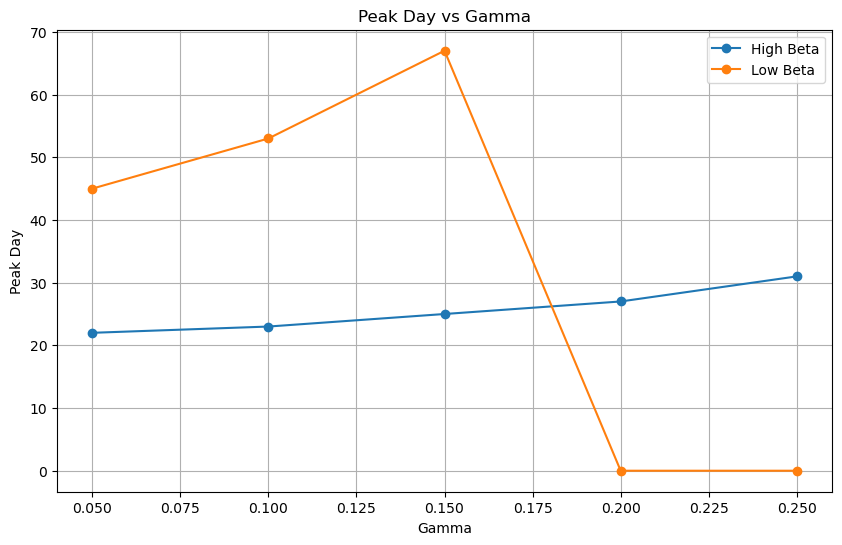

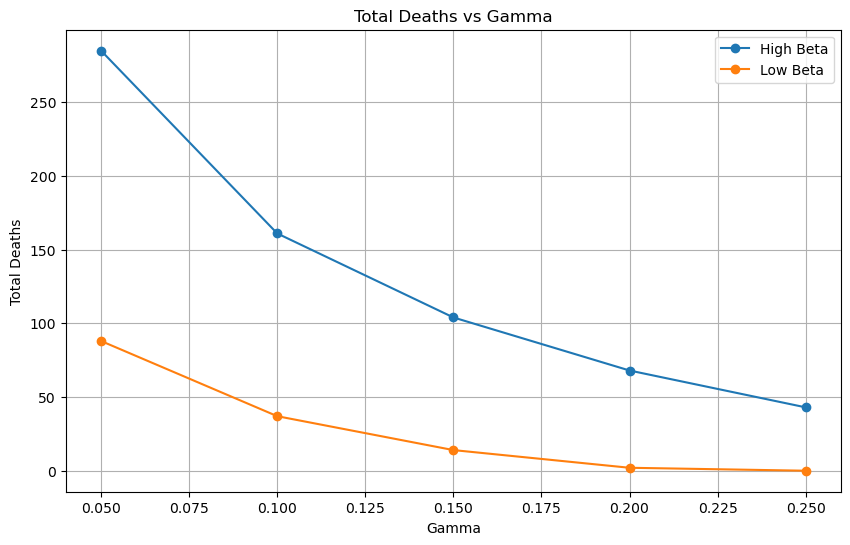

In [ ]:
# Plot R0 vs gamma
plt.figure(figsize=(10, 6))
plt.plot(results_high['gamma'], results_high['R0'], label='High Beta', marker='o')
plt.plot(results_low['gamma'], results_low['R0'], label='Low Beta', marker='o')
plt.xlabel('Gamma')
plt.ylabel('R0')
plt.title('R0 vs Gamma')
plt.legend()
plt.grid(True)
plt.show()

# Plot peak_infected vs gamma
plt.figure(figsize=(10, 6))
plt.plot(results_high['gamma'], results_high['peak_infected'], label='High Beta', marker='o')
plt.plot(results_low['gamma'], results_low['peak_infected'], label='Low Beta', marker='o')
plt.xlabel('Gamma')
plt.ylabel('Peak Infected')
plt.title('Peak Infected vs Gamma')
plt.legend()
plt.grid(True)
plt.show()

# Plot peak_day vs gamma
plt.figure(figsize=(10, 6))
plt.plot(results_high['gamma'], results_high['peak_day'], label='High Beta', marker='o')
plt.plot(results_low['gamma'], results_low['peak_day'], label='Low Beta', marker='o')
plt.xlabel('Gamma')
plt.ylabel('Peak Day')
plt.title('Peak Day vs Gamma')
plt.legend()
plt.grid(True)
plt.show()

# Plot total_deaths vs gamma
plt.figure(figsize=(10, 6))
plt.plot(results_high['gamma'], results_high['total_deaths'], label='High Beta', marker='o')
plt.plot(results_low['gamma'], results_low['total_deaths'], label='Low Beta', marker='o')
plt.xlabel('Gamma')
plt.ylabel('Total Deaths')
plt.title('Total Deaths vs Gamma')
plt.legend()
plt.grid(True)
plt.show()

The high infection rate scenario is the worse one for public health for the values we care about (mortality, peak infections), while having the sooner peak day. The 0 peak day in the low infection rate scenario is due to the simulation not being long enough to capture the peak.

3.1: Parameter impact analysis

Peak infections:
A increased recovery rate reduces the number of peak infections.
For example a increase from gamma=0.05 to gamma=0.1 of the low-beta simulation reduces the infection peak from ~380 to ~150 -> -230
A increase from gamma=0.05 to gamma=0.1 of the high-beta simulation reduces the infection peak from ~550 to ~360 -> -190
-> Has initially a stronger effect on lower beta values.
From a visual inspection this effect is reduced as the peak infections approach zero. A high-beta value leads to a more linear behaviour of this effect. 


Total deaths:
A increased recovery rate reduces the number of total deaths.
For example a increase from gamma=0.05 to gamma=0.1 of the low-beta simulation reduces the total deaths from ~90 to ~40 -> -50
A increase from gamma=0.05 to gamma=0.1 of the high-beta simulation reduces the total deaths from ~280 to ~160 -> -120
-> Has a stronger effect on higher beta values. Effect gets weaker as total deaths aproach zero.

Epidemic duration:
A increased recovery rate reduces the epidemic duration.
For example a increase from gamma=0.05 to gamma=0.1 of the low-beta simulation reduces the total deaths from ~3.6 to ~1.9 -> -1.7
A increase from gamma=0.05 to gamma=0.1 of the high-beta simulation reduces the infection peak from ~5.8 to ~3.3 -> -2.5
-> has a stronger effect on higher beta values

3.2: Intervention analysis

Scenario A has a high transmission, beta = 0.4.
gamma = 0.05 -> ~280
gamma = 0.1 -> ~160
gamma = 0.2 -> ~70
160/280 = ~0.57
70/160 = ~0.43
The total deaths should be reduced by ~40%-60% when the gamma value gets doubled.

3.3: Real-world application

A possible mechanism that increases the recovery rate would be a newly developed drug (other examples would be weather changes that can impact the body and influence recovery times, or the general population health, indicated by age, fitness and eating habits)

A newly discovered drug is effective against the virus or bacterium causing the epidemic. Already infected people can take the medication to aid their body in the fight against the intruder and therefore recover faster (or also potentially reduce death rates). How realistic a medication effectiveness is is strongly case dependent. What can be said however is that the virus/bacterium could adapt to resist the medication, and that production capabilities cna be a potential bottleneck.